In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [3]:
data_df = pd.read_csv("./data.csv")

In [4]:
print(data_df)
# Data ve muc luong, co du dinh mua mon hang hay khong

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


## Data Imputation (Missing Data Replacement)
    Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [9]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum() #isna de kiem tra gia tri nao la not a number
    missing_percent = missing_data/len(data_df)*100
    print(f"Columns {col}: has {missing_percent}% missing data")

Columns Country: has 0.0% missing data
Columns Age: has 10.0% missing data
Columns Salary: has 10.0% missing data
Columns Purchased: has 0.0% missing data


<AxesSubplot:>

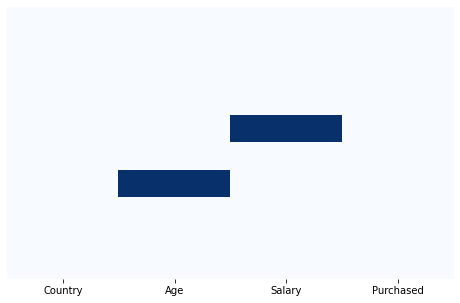

In [15]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(data_df.isna(), cmap = "Blues", cbar=False, yticklabels=False )

In [16]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [53]:
# x: 'feature' Country, Age, Salary
X = data_df.iloc[:,:-1].values
# y: 'target' Purchased
y = data_df.iloc[:,-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [29]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [54]:
from sklearn.impute import SimpleImputer
#Thay the gia tri bi missing bang method chung ta quy dinh
#Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,1:3]) #fit vao du lieu
X[:,1:3] = imputer.transform(X[:,1:3])

In [55]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data
### Encode Independent variable(X)

In [56]:
# convert dư liệu chuỗi thành số --> mã hóa
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable(Y)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [60]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])

In [65]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [68]:
X_test[:,3:] = sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, -7.175636212782505, -7.416245698589758],
       [0.0, 0.0, 1.0, -8.056597917488327, -7.416725446024309]],
      dtype=object)

# GOOD LUCK TO YOU